In [7]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
import time
from bs4 import BeautifulSoup
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#!pip install selenium

In [13]:
driver = webdriver.Chrome()

# URL of MagicBricks PG hostels in Hyderabad
url = "https://www.magicbricks.com/property-for-rent/residential-paying-guest?city=2060"

driver.get(url)
time.sleep(5)  # Wait for the initial load

pg_hostels = []
scroll_pause_time = 5  # Pause to wait for loading new data
last_height = driver.execute_script("return document.body.scrollHeight")

while True:
    # Scroll down to the bottom
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    
    # Wait to load new content
    time.sleep(scroll_pause_time)
    
    # Calculate new scroll height and compare with the last scroll height
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height
    
    # Get page source and parse with BeautifulSoup
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    
    # Extract data
    listings = soup.find_all('div', class_='m-srp-card clearfix newLaunched')  # Update class name based on the actual HTML structure
    for listing in listings:
        try:
            title = listing.find('span', class_='m-srp-card__title__name').text.strip()
        except:
            title = None
    
        try:
            location = listing.find('div', class_='m-srp-card__link m-srp-card__link--nearby').text.strip()
        except:
            location = None
    
        try:
            price = listing.find('div', class_='m-srp-card__price').text.strip()
        except:
            price = None

        try:
            room_info = listing.find('div', class_='m-srp-card__roomInfo__room-detail clearfix').text.strip()
        except:
            price = None

        try:
            type = listing.find('div', class_='m-srp-card__info flex__item').text.strip()
        except:
            price = None

        try:
            places = listing.find('div', class_='m-srp-card__tuple__flex').text.strip()
        except:
            places = None
    
        pg_hostels.append({
            'Title': title,
            'Location': location,
            'Price': price,
            'Room Info':room_info,
            'Type':type,
            'Places':places
        })

# Convert to DataFrame and save to CSV
df = pd.DataFrame(pg_hostels)

# Close the WebDriver
driver.quit()

print("Scraping complete.")
df

Scraping complete.


,Title,Location,Price,Room Info,Type,Places
0,Zolo Lakeview PG/Paying Guest,in Gowlidoddy,"₹9,597 Onwards","Single Room ₹19,194 Twin Sharing ₹9,597","Coed₹9,597 OnwardsBeds Available Zolo Lakeview...",430.9 Km from Udaya Memorial High School 437.8...
1,Zolo Green Valley PG/Paying Guest,in Kondapur,"₹10,557 Onwards","Twin Sharing With AC ₹10,557 Single Room With...","Coed₹10,557 OnwardsBeds Available Zolo Green V...",424.4 Km from Udaya Memorial High School 431.2...
2,Surya Luxury Coliving and Men's PG/Paying Guest,in Kondapur,"₹7,000 Onwards","Single Room ₹16,500 Twin Sharing ₹10,500 Tri...","Coed₹7,000 OnwardsFood IncludedBeds Available ...",0.2 Km from Sarada High School 0.8 Km from Koh...
3,ASHOK REDDY PG/Paying Guest FOR MEN,in Kondapur,"₹6,499 Onwards","Twin Sharing ₹9,000 Triple Sharing ₹7,499 Fo...","Boys₹6,499 OnwardsFood IncludedBeds Available ...",0.8 Km from World One School 1.6 Km from Kohin...
4,SRI SRINIVASA COLIVING PG/Paying Guest AND ACC...,in Kondapur,"₹9,000 Onwards","Single Room With AC ₹19,500 Twin Sharing With...","Coed₹9,000 OnwardsFood IncludedBeds Available ...",0.8 Km from World One School 1.9 Km from Kohin...
...,...,...,...,...,...,...
345,N GRAND MEN'S PG/Paying Guest,in Kondapur,"₹10,000 Onwards","Single Room With AC ₹22,000 Twin Sharing With...","Boys₹10,000 OnwardsFood IncludedBeds Available...",0.2 Km from Chirec International School 1.4 Km...
346,LAXMI VENKTESWARA CO-LIVING PG/Paying Guest AN...,in Madhapur,"₹10,000 Onwards","Single Room With AC ₹27,000 Twin Sharing With...","Coed₹10,000 OnwardsFood IncludedBeds Available...",0.2 Km from Global Edgeschool Madhapur 0.6 Km ...
347,BSR WOMENS PG/Paying Guest,in Gachibowli,"₹7,000 Onwards","Single Room ₹18,000 Twin Sharing ₹10,000 Tri...","Girls₹7,000 OnwardsFood IncludedBeds Available...",0.2 Km from Asha Kiran 1.0 Km from Dlf Cyberci...
348,SKY INN Co Living PG/Paying Guest,in Kondapur,"₹8,500 Onwards","Single Room ₹18,000 Twin Sharing ₹13,000 Tri...","Coed₹8,500 OnwardsFood IncludedBeds Available ...",0.1 Km from Sarada High School 0.6 Km from Koh...


## Exploratory Data Analysis on Pg_hostels

## Data Creation

In [ ]:
df.to_csv("pghostels.csv")

In [16]:
df

,Title,Location,Price,Room Info,Type,Places
0,Zolo Lakeview PG/Paying Guest,in Gowlidoddy,"₹9,597 Onwards","Single Room ₹19,194 Twin Sharing ₹9,597","Coed₹9,597 OnwardsBeds Available Zolo Lakeview...",430.9 Km from Udaya Memorial High School 437.8...
1,Zolo Green Valley PG/Paying Guest,in Kondapur,"₹10,557 Onwards","Twin Sharing With AC ₹10,557 Single Room With...","Coed₹10,557 OnwardsBeds Available Zolo Green V...",424.4 Km from Udaya Memorial High School 431.2...
2,Surya Luxury Coliving and Men's PG/Paying Guest,in Kondapur,"₹7,000 Onwards","Single Room ₹16,500 Twin Sharing ₹10,500 Tri...","Coed₹7,000 OnwardsFood IncludedBeds Available ...",0.2 Km from Sarada High School 0.8 Km from Koh...
3,ASHOK REDDY PG/Paying Guest FOR MEN,in Kondapur,"₹6,499 Onwards","Twin Sharing ₹9,000 Triple Sharing ₹7,499 Fo...","Boys₹6,499 OnwardsFood IncludedBeds Available ...",0.8 Km from World One School 1.6 Km from Kohin...
4,SRI SRINIVASA COLIVING PG/Paying Guest AND ACC...,in Kondapur,"₹9,000 Onwards","Single Room With AC ₹19,500 Twin Sharing With...","Coed₹9,000 OnwardsFood IncludedBeds Available ...",0.8 Km from World One School 1.9 Km from Kohin...
...,...,...,...,...,...,...
345,N GRAND MEN'S PG/Paying Guest,in Kondapur,"₹10,000 Onwards","Single Room With AC ₹22,000 Twin Sharing With...","Boys₹10,000 OnwardsFood IncludedBeds Available...",0.2 Km from Chirec International School 1.4 Km...
346,LAXMI VENKTESWARA CO-LIVING PG/Paying Guest AN...,in Madhapur,"₹10,000 Onwards","Single Room With AC ₹27,000 Twin Sharing With...","Coed₹10,000 OnwardsFood IncludedBeds Available...",0.2 Km from Global Edgeschool Madhapur 0.6 Km ...
347,BSR WOMENS PG/Paying Guest,in Gachibowli,"₹7,000 Onwards","Single Room ₹18,000 Twin Sharing ₹10,000 Tri...","Girls₹7,000 OnwardsFood IncludedBeds Available...",0.2 Km from Asha Kiran 1.0 Km from Dlf Cyberci...
348,SKY INN Co Living PG/Paying Guest,in Kondapur,"₹8,500 Onwards","Single Room ₹18,000 Twin Sharing ₹13,000 Tri...","Coed₹8,500 OnwardsFood IncludedBeds Available ...",0.1 Km from Sarada High School 0.6 Km from Koh...


## To find shape of data frame

In [18]:
df.shape #to find no of rows and columns

(350, 6)

In [20]:
df.columns #to find no of columns

Index(['Title', 'Location', 'Price', 'Room Info', 'Type', 'Places'], dtype='object')

## Checking null values

In [22]:
df.isna().sum() #checking null values

Title        0
Location     0
Price        0
Room Info    0
Type         0
Places       0
dtype: int64

In [24]:
df.dtypes #finding data types

Title        object
Location     object
Price        object
Room Info    object
Type         object
Places       object
dtype: object

## Replacing null value

In [26]:
df['Price'] = df['Price'].fillna(df['Price'].mode) #filling null value

In [28]:
df.isna().sum()

Title        0
Location     0
Price        0
Room Info    0
Type         0
Places       0
dtype: int64

## Duplicate values

In [30]:
df.duplicated().sum() #to find duplicate values

299

## Finding value counts gives the no. of values of that particular row

In [32]:
df['Location'].value_counts()

Location
in Kondapur                             170
in Madhapur                              45
in Gachibowli                            35
in Hitech City                           35
in Gowlidoddy                            10
in Financial District, Nanakram Guda     10
in Khanammet                             10
in Kukatpally, NH 9                      10
in Hafeezpet, NH 9                        5
in Phase 9 KPHB                           5
in Journalists Colony Phase 3             5
in Phase 1 KPHB                           5
in KPHB Phase 15                          5
Name: count, dtype: int64

In [34]:
df['Title'].value_counts()

Title
Zolo Green Valley PG/Paying Guest                                 15
Zolo Lakeview PG/Paying Guest                                     10
TULASI PREMIUM CO LIVING AND GUEST ROOMS PG/Paying Guest          10
TSR Co Living PG/Paying Guest                                     10
BSR WOMENS PG/Paying Guest                                        10
LAXMI VENKTESWARA CO-LIVING PG/Paying Guest AND HOSTEL            10
N GRAND MEN'S PG/Paying Guest                                     10
HI-TECH COLIVING PG/Paying Guest                                  10
SVR Luxury Stay For Men PG/Paying Guest                           10
Hari Hara Co Living PG/Paying Guest                               10
SKY INN Co Living PG/Paying Guest                                 10
SRI SRI COLIVING PG/Paying Guest                                  10
SERENEST COLIVING PG/Paying Guest                                 10
Our Home Premium Luxury PG/Paying Guest For Women                 10
LUMINOUS Premium LIVING Spac

In [36]:
df['Places'].value_counts()

Places
0.5 Km from Sri Rama High School 1.4 Km from Kohinoor IT Park 3.3 Km from Hitech Metro Station                                                            30
0.9 Km from Sri Venkateshwara Group Of Colleges 0.0 Km from Aponline 0.6 Km from Raidurg Metro Station                                                    15
430.9 Km from Udaya Memorial High School 437.8 Km from Shri Kartikeya Pharma 475.0 Km from JJ Institution of Information Technology                       10
1.3 Km from Sarada High School 1.2 Km from Modern Profound Tech Park 1.8 Km from Hitech Metro Station                                                     10
0.2 Km from Sri Venkateshwara Group Of Colleges 0.3 Km from Software Technology Parks Of India 0.0 Km from Hitech Metro Station                           10
0.0 Km from Oslers Academy 0.5 Km from Avyas Tech Park Nisum Technology 0.9 Km from Hitech City Metro Station (Blue Line)                                 10
424.4 Km from Udaya Memorial High School 431.2 Km f

In [38]:
df['Price'].value_counts()


Price
₹9,000 Onwards     75
₹7,000 Onwards     35
₹11,000 Onwards    25
₹8,500 Onwards     25
₹10,000 Onwards    25
₹7,500 Onwards     20
₹10,557 Onwards    15
₹8,000 Onwards     15
₹9,597 Onwards     10
₹6,500 Onwards     10
₹13,000 Onwards    10
₹6,499 Onwards     10
₹12,500 Onwards     5
₹12,000 Onwards     5
₹9,999 Onwards      5
₹5,999 Onwards      5
₹8,499 Onwards      5
₹6,000 Onwards      5
₹5,000 Onwards      5
₹9,072 Onwards      5
₹8,587 Onwards      5
₹9,143 Onwards      5
₹6,718 Onwards      5
₹10,608 Onwards     5
₹7,526 Onwards      5
₹7,425 Onwards      5
₹8,031 Onwards      5
Name: count, dtype: int64

In [40]:
df['Room Info'].value_counts()

Room Info
Single Room ₹19,194  Twin Sharing ₹9,597                                                                                                                                      10
Single Room ₹20,000  Twin Sharing ₹12,000  Triple Sharing ₹9,000                                                                                                              10
Twin Sharing With AC ₹10,557  Single Room With AC ₹16,820                                                                                                                     10
Single Room With AC ₹17,000  Twin Sharing With AC ₹11,500  Triple Sharing With AC ₹9,000                                                                                      10
Single Room ₹18,000  Twin Sharing ₹10,000  Triple Sharing ₹8,500  Four Sharing ₹7,000                                                                                         10
Single Room With AC ₹27,000  Twin Sharing With AC ₹13,500  Triple Sharing With AC ₹10,000                

In [61]:
df['Type'].value_counts()

Type
Coed₹9,597 OnwardsBeds Available Zolo Lakeview PG/Paying Guest  in Gowlidoddy Single Room ₹19,194  Twin Sharing ₹9,597 near Wipro Circle Bus Stop Wifi AvailableAC Not AvailableFood Not Available+12 More Zolo Lakeview is in the secure and vibrant PG in Gowlidoddy, which is an exclusively unisex PG catering to both students and working professionals. It provides a range of contemporary amenities, including Power Backup, Wi-Fi, and TV, to enhance your comfort. Zolo Park View PG offers options for single and double occupancy. Its strategic location places it in proximity to prominent commercial and educational centres.  Read More  View Phone No.  Contact Owner view on map                                                                                                                                                                                                                                                                                                                               

In [42]:
df.isnull().sum(axis=1)

0      0
1      0
2      0
3      0
4      0
      ..
345    0
346    0
347    0
348    0
349    0
Length: 350, dtype: int64

## finding first five rows

In [44]:
df.head()

,Title,Location,Price,Room Info,Type,Places
0,Zolo Lakeview PG/Paying Guest,in Gowlidoddy,"₹9,597 Onwards","Single Room ₹19,194 Twin Sharing ₹9,597","Coed₹9,597 OnwardsBeds Available Zolo Lakeview...",430.9 Km from Udaya Memorial High School 437.8...
1,Zolo Green Valley PG/Paying Guest,in Kondapur,"₹10,557 Onwards","Twin Sharing With AC ₹10,557 Single Room With...","Coed₹10,557 OnwardsBeds Available Zolo Green V...",424.4 Km from Udaya Memorial High School 431.2...
2,Surya Luxury Coliving and Men's PG/Paying Guest,in Kondapur,"₹7,000 Onwards","Single Room ₹16,500 Twin Sharing ₹10,500 Tri...","Coed₹7,000 OnwardsFood IncludedBeds Available ...",0.2 Km from Sarada High School 0.8 Km from Koh...
3,ASHOK REDDY PG/Paying Guest FOR MEN,in Kondapur,"₹6,499 Onwards","Twin Sharing ₹9,000 Triple Sharing ₹7,499 Fo...","Boys₹6,499 OnwardsFood IncludedBeds Available ...",0.8 Km from World One School 1.6 Km from Kohin...
4,SRI SRINIVASA COLIVING PG/Paying Guest AND ACC...,in Kondapur,"₹9,000 Onwards","Single Room With AC ₹19,500 Twin Sharing With...","Coed₹9,000 OnwardsFood IncludedBeds Available ...",0.8 Km from World One School 1.9 Km from Kohin...


## finding last five rows

In [46]:
df.tail()

,Title,Location,Price,Room Info,Type,Places
345,N GRAND MEN'S PG/Paying Guest,in Kondapur,"₹10,000 Onwards","Single Room With AC ₹22,000 Twin Sharing With...","Boys₹10,000 OnwardsFood IncludedBeds Available...",0.2 Km from Chirec International School 1.4 Km...
346,LAXMI VENKTESWARA CO-LIVING PG/Paying Guest AN...,in Madhapur,"₹10,000 Onwards","Single Room With AC ₹27,000 Twin Sharing With...","Coed₹10,000 OnwardsFood IncludedBeds Available...",0.2 Km from Global Edgeschool Madhapur 0.6 Km ...
347,BSR WOMENS PG/Paying Guest,in Gachibowli,"₹7,000 Onwards","Single Room ₹18,000 Twin Sharing ₹10,000 Tri...","Girls₹7,000 OnwardsFood IncludedBeds Available...",0.2 Km from Asha Kiran 1.0 Km from Dlf Cyberci...
348,SKY INN Co Living PG/Paying Guest,in Kondapur,"₹8,500 Onwards","Single Room ₹18,000 Twin Sharing ₹13,000 Tri...","Coed₹8,500 OnwardsFood IncludedBeds Available ...",0.1 Km from Sarada High School 0.6 Km from Koh...
349,TSR Co Living PG/Paying Guest,in Kondapur,"₹9,000 Onwards","Single Room With AC ₹17,000 Twin Sharing With...","Coed₹9,000 OnwardsFood IncludedBeds Available ...",0.2 Km from Sri Gautham Grammar High School 0....


## finding statistical data

In [48]:
df.describe()

,Title,Location,Price,Room Info,Type,Places
count,350,350,350,350,350,350
unique,50,13,27,51,51,44
top,Zolo Green Valley PG/Paying Guest,in Kondapur,"₹9,000 Onwards","Single Room ₹19,194 Twin Sharing ₹9,597","Coed₹9,597 OnwardsBeds Available Zolo Lakeview...",0.5 Km from Sri Rama High School 1.4 Km from K...
freq,15,170,75,10,10,30


## To replace string value from price

In [50]:
df['Price'] = df['Price'].fillna(0)

In [54]:
df

,Title,Location,Price,Room Info,Type,Places
0,Zolo Lakeview PG/Paying Guest,in Gowlidoddy,9597,"Single Room ₹19,194 Twin Sharing ₹9,597","Coed₹9,597 OnwardsBeds Available Zolo Lakeview...",430.9 Km from Udaya Memorial High School 437.8...
1,Zolo Green Valley PG/Paying Guest,in Kondapur,10557,"Twin Sharing With AC ₹10,557 Single Room With...","Coed₹10,557 OnwardsBeds Available Zolo Green V...",424.4 Km from Udaya Memorial High School 431.2...
2,Surya Luxury Coliving and Men's PG/Paying Guest,in Kondapur,7000,"Single Room ₹16,500 Twin Sharing ₹10,500 Tri...","Coed₹7,000 OnwardsFood IncludedBeds Available ...",0.2 Km from Sarada High School 0.8 Km from Koh...
3,ASHOK REDDY PG/Paying Guest FOR MEN,in Kondapur,6499,"Twin Sharing ₹9,000 Triple Sharing ₹7,499 Fo...","Boys₹6,499 OnwardsFood IncludedBeds Available ...",0.8 Km from World One School 1.6 Km from Kohin...
4,SRI SRINIVASA COLIVING PG/Paying Guest AND ACC...,in Kondapur,9000,"Single Room With AC ₹19,500 Twin Sharing With...","Coed₹9,000 OnwardsFood IncludedBeds Available ...",0.8 Km from World One School 1.9 Km from Kohin...
...,...,...,...,...,...,...
345,N GRAND MEN'S PG/Paying Guest,in Kondapur,10000,"Single Room With AC ₹22,000 Twin Sharing With...","Boys₹10,000 OnwardsFood IncludedBeds Available...",0.2 Km from Chirec International School 1.4 Km...
346,LAXMI VENKTESWARA CO-LIVING PG/Paying Guest AN...,in Madhapur,10000,"Single Room With AC ₹27,000 Twin Sharing With...","Coed₹10,000 OnwardsFood IncludedBeds Available...",0.2 Km from Global Edgeschool Madhapur 0.6 Km ...
347,BSR WOMENS PG/Paying Guest,in Gachibowli,7000,"Single Room ₹18,000 Twin Sharing ₹10,000 Tri...","Girls₹7,000 OnwardsFood IncludedBeds Available...",0.2 Km from Asha Kiran 1.0 Km from Dlf Cyberci...
348,SKY INN Co Living PG/Paying Guest,in Kondapur,8500,"Single Room ₹18,000 Twin Sharing ₹13,000 Tri...","Coed₹8,500 OnwardsFood IncludedBeds Available ...",0.1 Km from Sarada High School 0.6 Km from Koh...


In [52]:
df['Price'] = df['Price'].apply(lambda x: x.replace('₹', '').replace(',', '').replace(' Onwards', '').replace('Twin Sharing', '') if isinstance(x, str) else x) 

In [58]:
df

,Title,Location,Price,Room Info,Type,Places
0,Zolo Lakeview PG/Paying Guest,in Gowlidoddy,9597,"Single Room ₹19,194 Twin Sharing ₹9,597","Coed₹9,597 OnwardsBeds Available Zolo Lakeview...",430.9 Km from Udaya Memorial High School 437.8...
1,Zolo Green Valley PG/Paying Guest,in Kondapur,10557,"Twin Sharing With AC ₹10,557 Single Room With...","Coed₹10,557 OnwardsBeds Available Zolo Green V...",424.4 Km from Udaya Memorial High School 431.2...
2,Surya Luxury Coliving and Men's PG/Paying Guest,in Kondapur,7000,"Single Room ₹16,500 Twin Sharing ₹10,500 Tri...","Coed₹7,000 OnwardsFood IncludedBeds Available ...",0.2 Km from Sarada High School 0.8 Km from Koh...
3,ASHOK REDDY PG/Paying Guest FOR MEN,in Kondapur,6499,"Twin Sharing ₹9,000 Triple Sharing ₹7,499 Fo...","Boys₹6,499 OnwardsFood IncludedBeds Available ...",0.8 Km from World One School 1.6 Km from Kohin...
4,SRI SRINIVASA COLIVING PG/Paying Guest AND ACC...,in Kondapur,9000,"Single Room With AC ₹19,500 Twin Sharing With...","Coed₹9,000 OnwardsFood IncludedBeds Available ...",0.8 Km from World One School 1.9 Km from Kohin...
...,...,...,...,...,...,...
345,N GRAND MEN'S PG/Paying Guest,in Kondapur,10000,"Single Room With AC ₹22,000 Twin Sharing With...","Boys₹10,000 OnwardsFood IncludedBeds Available...",0.2 Km from Chirec International School 1.4 Km...
346,LAXMI VENKTESWARA CO-LIVING PG/Paying Guest AN...,in Madhapur,10000,"Single Room With AC ₹27,000 Twin Sharing With...","Coed₹10,000 OnwardsFood IncludedBeds Available...",0.2 Km from Global Edgeschool Madhapur 0.6 Km ...
347,BSR WOMENS PG/Paying Guest,in Gachibowli,7000,"Single Room ₹18,000 Twin Sharing ₹10,000 Tri...","Girls₹7,000 OnwardsFood IncludedBeds Available...",0.2 Km from Asha Kiran 1.0 Km from Dlf Cyberci...
348,SKY INN Co Living PG/Paying Guest,in Kondapur,8500,"Single Room ₹18,000 Twin Sharing ₹13,000 Tri...","Coed₹8,500 OnwardsFood IncludedBeds Available ...",0.1 Km from Sarada High School 0.6 Km from Koh...


In [60]:
df['Location'] = df['Location'].apply(lambda x: x.replace('in', ''))

In [62]:
df

,Title,Location,Price,Room Info,Type,Places
0,Zolo Lakeview PG/Paying Guest,Gowlidoddy,9597,"Single Room ₹19,194 Twin Sharing ₹9,597","Coed₹9,597 OnwardsBeds Available Zolo Lakeview...",430.9 Km from Udaya Memorial High School 437.8...
1,Zolo Green Valley PG/Paying Guest,Kondapur,10557,"Twin Sharing With AC ₹10,557 Single Room With...","Coed₹10,557 OnwardsBeds Available Zolo Green V...",424.4 Km from Udaya Memorial High School 431.2...
2,Surya Luxury Coliving and Men's PG/Paying Guest,Kondapur,7000,"Single Room ₹16,500 Twin Sharing ₹10,500 Tri...","Coed₹7,000 OnwardsFood IncludedBeds Available ...",0.2 Km from Sarada High School 0.8 Km from Koh...
3,ASHOK REDDY PG/Paying Guest FOR MEN,Kondapur,6499,"Twin Sharing ₹9,000 Triple Sharing ₹7,499 Fo...","Boys₹6,499 OnwardsFood IncludedBeds Available ...",0.8 Km from World One School 1.6 Km from Kohin...
4,SRI SRINIVASA COLIVING PG/Paying Guest AND ACC...,Kondapur,9000,"Single Room With AC ₹19,500 Twin Sharing With...","Coed₹9,000 OnwardsFood IncludedBeds Available ...",0.8 Km from World One School 1.9 Km from Kohin...
...,...,...,...,...,...,...
345,N GRAND MEN'S PG/Paying Guest,Kondapur,10000,"Single Room With AC ₹22,000 Twin Sharing With...","Boys₹10,000 OnwardsFood IncludedBeds Available...",0.2 Km from Chirec International School 1.4 Km...
346,LAXMI VENKTESWARA CO-LIVING PG/Paying Guest AN...,Madhapur,10000,"Single Room With AC ₹27,000 Twin Sharing With...","Coed₹10,000 OnwardsFood IncludedBeds Available...",0.2 Km from Global Edgeschool Madhapur 0.6 Km ...
347,BSR WOMENS PG/Paying Guest,Gachibowli,7000,"Single Room ₹18,000 Twin Sharing ₹10,000 Tri...","Girls₹7,000 OnwardsFood IncludedBeds Available...",0.2 Km from Asha Kiran 1.0 Km from Dlf Cyberci...
348,SKY INN Co Living PG/Paying Guest,Kondapur,8500,"Single Room ₹18,000 Twin Sharing ₹13,000 Tri...","Coed₹8,500 OnwardsFood IncludedBeds Available ...",0.1 Km from Sarada High School 0.6 Km from Koh...


## converting object to float data type

In [97]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce') #errors{'ignore', 'raise', 'coerce'}, default 'raise' If 'raise', then invalid parsing will raise an exception. So errors can be used

In [99]:
df.dtypes

Title         object
Location      object
Price        float64
Room Info     object
Type          object
Places        object
dtype: object

## to get info of data set

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Title      350 non-null    object
 1   Location   350 non-null    object
 2   Price      350 non-null    int64 
 3   Room Info  350 non-null    object
 4   Type       350 non-null    object
 5   Places     350 non-null    object
dtypes: int64(1), object(5)
memory usage: 16.5+ KB


## Finding max and min values in the data frame

In [101]:
df['Price'].max() #finding maximum value

13000.0

In [103]:
df['Price'].min() #finding minimum value

5000.0

## Groupby
It splits the data into groups,applies a function to each group, and combines the result into a new data structure.

It can aggregate the data very effectively.

By using different conditions we can see the groupby data.

In [106]:
a = df.groupby('Price')
a

In [108]:
for Price in a:
    print(Price)

(5000.0,                                  Title   Location   Price  \
39   Stay Inn CoLiving PG/Paying Guest   Kondapur  5000.0   
109  Stay Inn CoLiving PG/Paying Guest   Kondapur  5000.0   
179  Stay Inn CoLiving PG/Paying Guest   Kondapur  5000.0   
249  Stay Inn CoLiving PG/Paying Guest   Kondapur  5000.0   
319  Stay Inn CoLiving PG/Paying Guest   Kondapur  5000.0   

                                             Room Info  \
39   Single Room With AC ₹16,000  Twin Sharing With...   
109  Single Room With AC ₹16,000  Twin Sharing With...   
179  Single Room With AC ₹16,000  Twin Sharing With...   
249  Single Room With AC ₹16,000  Twin Sharing With...   
319  Single Room With AC ₹16,000  Twin Sharing With...   

                                                  Type  \
39   Coed₹5,000 OnwardsFood Charge extraBeds Availa...   
109  Coed₹5,000 OnwardsFood Charge extraBeds Availa...   
179  Coed₹5,000 OnwardsFood Charge extraBeds Availa...   
249  Coed₹5,000 OnwardsFood Charge extraBed

In [110]:
a.get_group(11000) #It gives the grouped data where 11000 is present

,Title,Location,Price,Room Info,Type,Places
5,LUMINOUS Premium LIVING Space For Womens PG/Pa...,Gachibowli,11000.0,"Single Room With AC ₹26,000 Twin Sharing With...","Girls₹11,000 OnwardsFood IncludedBeds Availabl...",0.9 Km from Dr.K.S.Rao's IAS Academy 0.3 Km fr...
12,SVR Luxury Stay For Men PG/Paying Guest,Kondapur,11000.0,"Single Room With AC ₹25,000 Twin Sharing With...","Boys₹11,000 OnwardsFood IncludedBeds Available...",0.6 Km from New Bloom High School 0.5 Km from ...
20,Le Bestow Co-Living PG/Paying Guest,Hitech City,11000.0,"Single Room With AC ₹24,000 Twin Sharing ₹14,...","Coed₹11,000 OnwardsFood IncludedBeds Available...",0.9 Km from Sri Venkateshwara Group Of College...
56,LUMINOUS Premium LIVING Space For Womens PG/Pa...,Gachibowli,11000.0,"Single Room With AC ₹26,000 Twin Sharing With...","Girls₹11,000 OnwardsFood IncludedBeds Availabl...",0.9 Km from Dr.K.S.Rao's IAS Academy 0.3 Km fr...
63,SVR Luxury Stay For Men PG/Paying Guest,Kondapur,11000.0,"Single Room With AC ₹25,000 Twin Sharing With...","Boys₹11,000 OnwardsFood IncludedBeds Available...",0.6 Km from New Bloom High School 0.5 Km from ...
75,LUMINOUS Premium LIVING Space For Womens PG/Pa...,Gachibowli,11000.0,"Single Room With AC ₹26,000 Twin Sharing With...","Girls₹11,000 OnwardsFood IncludedBeds Availabl...",0.9 Km from Dr.K.S.Rao's IAS Academy 0.3 Km fr...
82,SVR Luxury Stay For Men PG/Paying Guest,Kondapur,11000.0,"Single Room With AC ₹25,000 Twin Sharing With...","Boys₹11,000 OnwardsFood IncludedBeds Available...",0.6 Km from New Bloom High School 0.5 Km from ...
90,Le Bestow Co-Living PG/Paying Guest,Hitech City,11000.0,"Single Room With AC ₹24,000 Twin Sharing ₹14,...","Coed₹11,000 OnwardsFood IncludedBeds Available...",0.9 Km from Sri Venkateshwara Group Of College...
126,LUMINOUS Premium LIVING Space For Womens PG/Pa...,Gachibowli,11000.0,"Single Room With AC ₹26,000 Twin Sharing With...","Girls₹11,000 OnwardsFood IncludedBeds Availabl...",0.9 Km from Dr.K.S.Rao's IAS Academy 0.3 Km fr...
133,SVR Luxury Stay For Men PG/Paying Guest,Kondapur,11000.0,"Single Room With AC ₹25,000 Twin Sharing With...","Boys₹11,000 OnwardsFood IncludedBeds Available...",0.6 Km from New Bloom High School 0.5 Km from ...


In [112]:
a.describe()

Title                                                                 \
        count unique                                                top freq   
Price                                                                          
5000.0      5      1                  Stay Inn CoLiving PG/Paying Guest    5   
5999.0      5      1  Sri Balaji Premium Spaces For Women PG/Paying ...    5   
6000.0      5      1                 M2 Prestige Womens PG/Paying Guest    5   
6499.0     10      1                ASHOK REDDY PG/Paying Guest FOR MEN   10   
6500.0     10      2                        Reddy Men's PG/Paying Guest    5   
6718.0      5      1                        Zolo Sierra PG/Paying Guest    5   
7000.0     35      5    Surya Luxury Coliving and Men's PG/Paying Guest   10   
7425.0      5      1                        Zolo Midway PG/Paying Guest    5   
7500.0     20      3  RK TECHIES CO LIVING PG/Paying Guest AND GUEST...   10   
7526.0      5      1                         Zolo Orbit PG/Paying Guest    5   
8000.0     15      2  Our Home Premium Luxury PG/Paying Guest For Women   10   
8031.0      5      1                         Zolo Lotus PG/Paying Guest    5   
8499.0      5      1                           PG/Paying Guestians Nest    5   
8500.0     25      3                Hari Hara Co Living PG/Paying Guest   10   
8587.0      5      1                          Zolo Styx PG/Paying Guest    5   
9000.0     75      9  SRI SRINIVASA COLIVING PG/Paying Guest AND ACC...   10   
9072.0      5      1                         Zolo Quest PG/Paying Guest    5   
9143.0      5      1                       Zolo Bourbon PG/Paying Guest    5   
9597.0     10      1                      Zolo Lakeview PG/Paying Guest   10   
9999.0      5      1                NEXORA COLIVING AND PG/Paying Guest    5   
10000.0    25      3                      N GRAND MEN'S PG/Paying Guest   10   
10557.0    15      1                  Zolo Green Valley PG/Paying Guest   15   
10608.0     5      1                        Zolo Rurban PG/Paying Guest    5   
11000.0    25      3  LUMINOUS Premium LIVING Space For Womens PG/Pa...   10   
12000.0     5      1               The Legacy Co Living PG/Paying Guest    5   
12500.0     5      1              Sasya Elite Co-Living PG/Paying Guest    5   
13000.0    10      2  Joy stayz premium coliving spaces PG/Paying Guest    5   

        Location                                               Room Info  \
           count unique                               top freq     count   
Price                                                                      
5000.0         5      1                          Kondapur    5         5   
5999.0         5      1                          Kondapur    5         5   
6000.0         5      1                       Hitech City    5         5   
6499.0        10      1                          Kondapur   10        10   
6500.0        10      2                          Kondapur    5        10   
6718.0         5      1                  Kukatpally, NH 9    5         5   
7000.0        35      2                          Kondapur   20        35   
7425.0         5      1                     KPHB Phase 15    5         5   
7500.0        20      3                          Kondapur   10        20   
7526.0         5      1                      Phase 1 KPHB    5         5   
8000.0        15      2   Fancial District, Nanakram Guda   10        15   
8031.0         5      1                          Madhapur    5         5   
8499.0         5      1                          Madhapur    5         5   
8500.0        25      2                          Kondapur   20        25   
8587.0         5      1                      Phase 9 KPHB    5         5   
9000.0        75      3                          Kondapur   50        75   
9072.0         5      1                       Hitech City    5         5   
9143.0         5      1                        Gachibowli    5         5   
9597.0     

## finding maximum and minimum values in groupby

In [115]:
max_values = df.groupby('Location')['Price'].max() #here it returns maximum values from location
max_values

Location
Fancial District, Nanakram Guda     8000.0
Gachibowli                         12500.0
Gowlidoddy                          9597.0
Hafeezpet, NH 9                     6500.0
Hitech City                        13000.0
Journalists Colony Phase 3         10608.0
KPHB Phase 15                       7425.0
Khanammet                           9000.0
Kondapur                           11000.0
Kukatpally, NH 9                    7500.0
Madhapur                           13000.0
Phase 1 KPHB                        7526.0
Phase 9 KPHB                        8587.0
Name: Price, dtype: float64

In [117]:
min_values = df.groupby('Location')['Price'].min() #here it returns minimum values from location
min_values

Location
Fancial District, Nanakram Guda     8000.0
Gachibowli                          7000.0
Gowlidoddy                          9597.0
Hafeezpet, NH 9                     6500.0
Hitech City                         6000.0
Journalists Colony Phase 3         10608.0
KPHB Phase 15                       7425.0
Khanammet                           9000.0
Kondapur                            5000.0
Kukatpally, NH 9                    6718.0
Madhapur                            8031.0
Phase 1 KPHB                        7526.0
Phase 9 KPHB                        8587.0
Name: Price, dtype: float64

## Sorting values

In [120]:
df

,Title,Location,Price,Room Info,Type,Places
0,Zolo Lakeview PG/Paying Guest,Gowlidoddy,9597.0,"Single Room ₹19,194 Twin Sharing ₹9,597","Coed₹9,597 OnwardsBeds Available Zolo Lakeview...",430.9 Km from Udaya Memorial High School 437.8...
1,Zolo Green Valley PG/Paying Guest,Kondapur,10557.0,"Twin Sharing With AC ₹10,557 Single Room With...","Coed₹10,557 OnwardsBeds Available Zolo Green V...",424.4 Km from Udaya Memorial High School 431.2...
2,Surya Luxury Coliving and Men's PG/Paying Guest,Kondapur,7000.0,"Single Room ₹16,500 Twin Sharing ₹10,500 Tri...","Coed₹7,000 OnwardsFood IncludedBeds Available ...",0.2 Km from Sarada High School 0.8 Km from Koh...
3,ASHOK REDDY PG/Paying Guest FOR MEN,Kondapur,6499.0,"Twin Sharing ₹9,000 Triple Sharing ₹7,499 Fo...","Boys₹6,499 OnwardsFood IncludedBeds Available ...",0.8 Km from World One School 1.6 Km from Kohin...
4,SRI SRINIVASA COLIVING PG/Paying Guest AND ACC...,Kondapur,9000.0,"Single Room With AC ₹19,500 Twin Sharing With...","Coed₹9,000 OnwardsFood IncludedBeds Available ...",0.8 Km from World One School 1.9 Km from Kohin...
...,...,...,...,...,...,...
345,N GRAND MEN'S PG/Paying Guest,Kondapur,10000.0,"Single Room With AC ₹22,000 Twin Sharing With...","Boys₹10,000 OnwardsFood IncludedBeds Available...",0.2 Km from Chirec International School 1.4 Km...
346,LAXMI VENKTESWARA CO-LIVING PG/Paying Guest AN...,Madhapur,10000.0,"Single Room With AC ₹27,000 Twin Sharing With...","Coed₹10,000 OnwardsFood IncludedBeds Available...",0.2 Km from Global Edgeschool Madhapur 0.6 Km ...
347,BSR WOMENS PG/Paying Guest,Gachibowli,7000.0,"Single Room ₹18,000 Twin Sharing ₹10,000 Tri...","Girls₹7,000 OnwardsFood IncludedBeds Available...",0.2 Km from Asha Kiran 1.0 Km from Dlf Cyberci...
348,SKY INN Co Living PG/Paying Guest,Kondapur,8500.0,"Single Room ₹18,000 Twin Sharing ₹13,000 Tri...","Coed₹8,500 OnwardsFood IncludedBeds Available ...",0.1 Km from Sarada High School 0.6 Km from Koh...


In [122]:
df['Price'].sort_values(ascending=True) #by giving ascending value true it gives small to largest

249     5000.0
319     5000.0
39      5000.0
179     5000.0
109     5000.0
        ...   
95     13000.0
165    13000.0
169    13000.0
305    13000.0
235    13000.0
Name: Price, Length: 350, dtype: float64

In [124]:
df.sort_values('Price',ascending=False) #it gives all the columns price with sorted.

,Title,Location,Price,Room Info,Type,Places
29,The Maski House PG/Paying Guest,Hitech City,13000.0,"Single Room With AC ₹25,000 Twin Sharing With...","Coed₹13,000 OnwardsBeds Available 5.0 /5Overal...",0.9 Km from Sri Venkateshwara Group Of College...
235,Joy stayz premium coliving spaces PG/Paying Guest,Madhapur,13000.0,"Twin Sharing With AC ₹15,000 Triple Sharing W...","Coed₹13,000 OnwardsFood IncludedBeds Available...",0.0 Km from Oslers Academy 0.5 Km from Avyas T...
309,The Maski House PG/Paying Guest,Hitech City,13000.0,"Single Room With AC ₹25,000 Twin Sharing With...","Coed₹13,000 OnwardsBeds Available 5.0 /5Overal...",0.9 Km from Sri Venkateshwara Group Of College...
95,Joy stayz premium coliving spaces PG/Paying Guest,Madhapur,13000.0,"Twin Sharing With AC ₹15,000 Triple Sharing W...","Coed₹13,000 OnwardsFood IncludedBeds Available...",0.0 Km from Oslers Academy 0.5 Km from Avyas T...
305,Joy stayz premium coliving spaces PG/Paying Guest,Madhapur,13000.0,"Twin Sharing With AC ₹15,000 Triple Sharing W...","Coed₹13,000 OnwardsFood IncludedBeds Available...",0.0 Km from Oslers Academy 0.5 Km from Avyas T...
...,...,...,...,...,...,...
109,Stay Inn CoLiving PG/Paying Guest,Kondapur,5000.0,"Single Room With AC ₹16,000 Twin Sharing With...","Coed₹5,000 OnwardsFood Charge extraBeds Availa...",1.3 Km from Vidya Vani High School 2.8 Km from...
249,Stay Inn CoLiving PG/Paying Guest,Kondapur,5000.0,"Single Room With AC ₹16,000 Twin Sharing With...","Coed₹5,000 OnwardsFood Charge extraBeds Availa...",1.3 Km from Vidya Vani High School 2.8 Km from...
179,Stay Inn CoLiving PG/Paying Guest,Kondapur,5000.0,"Single Room With AC ₹16,000 Twin Sharing With...","Coed₹5,000 OnwardsFood Charge extraBeds Availa...",1.3 Km from Vidya Vani High School 2.8 Km from...
39,Stay Inn CoLiving PG/Paying Guest,Kondapur,5000.0,"Single Room With AC ₹16,000 Twin Sharing With...","Coed₹5,000 OnwardsFood Charge extraBeds Availa...",1.3 Km from Vidya Vani High School 2.8 Km from...


In [126]:
df.sort_values(['Price','Type'],ascending=True) #it returns price and type ascending values

,Title,Location,Price,Room Info,Type,Places
39,Stay Inn CoLiving PG/Paying Guest,Kondapur,5000.0,"Single Room With AC ₹16,000 Twin Sharing With...","Coed₹5,000 OnwardsFood Charge extraBeds Availa...",1.3 Km from Vidya Vani High School 2.8 Km from...
109,Stay Inn CoLiving PG/Paying Guest,Kondapur,5000.0,"Single Room With AC ₹16,000 Twin Sharing With...","Coed₹5,000 OnwardsFood Charge extraBeds Availa...",1.3 Km from Vidya Vani High School 2.8 Km from...
179,Stay Inn CoLiving PG/Paying Guest,Kondapur,5000.0,"Single Room With AC ₹16,000 Twin Sharing With...","Coed₹5,000 OnwardsFood Charge extraBeds Availa...",1.3 Km from Vidya Vani High School 2.8 Km from...
249,Stay Inn CoLiving PG/Paying Guest,Kondapur,5000.0,"Single Room With AC ₹16,000 Twin Sharing With...","Coed₹5,000 OnwardsFood Charge extraBeds Availa...",1.3 Km from Vidya Vani High School 2.8 Km from...
319,Stay Inn CoLiving PG/Paying Guest,Kondapur,5000.0,"Single Room With AC ₹16,000 Twin Sharing With...","Coed₹5,000 OnwardsFood Charge extraBeds Availa...",1.3 Km from Vidya Vani High School 2.8 Km from...
...,...,...,...,...,...,...
25,Joy stayz premium coliving spaces PG/Paying Guest,Madhapur,13000.0,"Twin Sharing With AC ₹15,000 Triple Sharing W...","Coed₹13,000 OnwardsFood IncludedBeds Available...",0.0 Km from Oslers Academy 0.5 Km from Avyas T...
95,Joy stayz premium coliving spaces PG/Paying Guest,Madhapur,13000.0,"Twin Sharing With AC ₹15,000 Triple Sharing W...","Coed₹13,000 OnwardsFood IncludedBeds Available...",0.0 Km from Oslers Academy 0.5 Km from Avyas T...
165,Joy stayz premium coliving spaces PG/Paying Guest,Madhapur,13000.0,"Twin Sharing With AC ₹15,000 Triple Sharing W...","Coed₹13,000 OnwardsFood IncludedBeds Available...",0.0 Km from Oslers Academy 0.5 Km from Avyas T...
235,Joy stayz premium coliving spaces PG/Paying Guest,Madhapur,13000.0,"Twin Sharing With AC ₹15,000 Triple Sharing W...","Coed₹13,000 OnwardsFood IncludedBeds Available...",0.0 Km from Oslers Academy 0.5 Km from Avyas T...


In [128]:
df[df['Price']<10000].sort_values(by=['Location','Places']) #it gives sorted values less than 10000

,Title,Location,Price,Room Info,Type,Places
6,Our Home Premium Luxury PG/Paying Guest For Women,"Fancial District, Nanakram Guda",8000.0,"Single Room ₹24,000 Twin Sharing ₹12,500 Tri...","Girls₹8,000 OnwardsFood IncludedBeds Available...",0.9 Km from Amazon Hyderabad Campus 0.4 Km fro...
57,Our Home Premium Luxury PG/Paying Guest For Women,"Fancial District, Nanakram Guda",8000.0,"Single Room ₹24,000 Twin Sharing ₹12,500 Tri...","Girls₹8,000 OnwardsFood IncludedBeds Available...",0.9 Km from Amazon Hyderabad Campus 0.4 Km fro...
76,Our Home Premium Luxury PG/Paying Guest For Women,"Fancial District, Nanakram Guda",8000.0,"Single Room ₹24,000 Twin Sharing ₹12,500 Tri...","Girls₹8,000 OnwardsFood IncludedBeds Available...",0.9 Km from Amazon Hyderabad Campus 0.4 Km fro...
127,Our Home Premium Luxury PG/Paying Guest For Women,"Fancial District, Nanakram Guda",8000.0,"Single Room ₹24,000 Twin Sharing ₹12,500 Tri...","Girls₹8,000 OnwardsFood IncludedBeds Available...",0.9 Km from Amazon Hyderabad Campus 0.4 Km fro...
146,Our Home Premium Luxury PG/Paying Guest For Women,"Fancial District, Nanakram Guda",8000.0,"Single Room ₹24,000 Twin Sharing ₹12,500 Tri...","Girls₹8,000 OnwardsFood IncludedBeds Available...",0.9 Km from Amazon Hyderabad Campus 0.4 Km fro...
...,...,...,...,...,...,...
46,Zolo Styx PG/Paying Guest,Phase 9 KPHB,8587.0,"Twin Sharing ₹8,587 Single Room ₹16,354","Coed₹8,587 OnwardsBeds Available 5.0 /5Overall...",425.1 Km from Udaya Memorial High School 432.0...
116,Zolo Styx PG/Paying Guest,Phase 9 KPHB,8587.0,"Twin Sharing ₹8,587 Single Room ₹16,354","Coed₹8,587 OnwardsBeds Available 5.0 /5Overall...",425.1 Km from Udaya Memorial High School 432.0...
186,Zolo Styx PG/Paying Guest,Phase 9 KPHB,8587.0,"Twin Sharing ₹8,587 Single Room ₹16,354","Coed₹8,587 OnwardsBeds Available 5.0 /5Overall...",425.1 Km from Udaya Memorial High School 432.0...
256,Zolo Styx PG/Paying Guest,Phase 9 KPHB,8587.0,"Twin Sharing ₹8,587 Single Room ₹16,354","Coed₹8,587 OnwardsBeds Available 5.0 /5Overall...",425.1 Km from Udaya Memorial High School 432.0...


## Filtering of data using some conditions

In [131]:
df #extracting the data frame

,Title,Location,Price,Room Info,Type,Places
0,Zolo Lakeview PG/Paying Guest,Gowlidoddy,9597.0,"Single Room ₹19,194 Twin Sharing ₹9,597","Coed₹9,597 OnwardsBeds Available Zolo Lakeview...",430.9 Km from Udaya Memorial High School 437.8...
1,Zolo Green Valley PG/Paying Guest,Kondapur,10557.0,"Twin Sharing With AC ₹10,557 Single Room With...","Coed₹10,557 OnwardsBeds Available Zolo Green V...",424.4 Km from Udaya Memorial High School 431.2...
2,Surya Luxury Coliving and Men's PG/Paying Guest,Kondapur,7000.0,"Single Room ₹16,500 Twin Sharing ₹10,500 Tri...","Coed₹7,000 OnwardsFood IncludedBeds Available ...",0.2 Km from Sarada High School 0.8 Km from Koh...
3,ASHOK REDDY PG/Paying Guest FOR MEN,Kondapur,6499.0,"Twin Sharing ₹9,000 Triple Sharing ₹7,499 Fo...","Boys₹6,499 OnwardsFood IncludedBeds Available ...",0.8 Km from World One School 1.6 Km from Kohin...
4,SRI SRINIVASA COLIVING PG/Paying Guest AND ACC...,Kondapur,9000.0,"Single Room With AC ₹19,500 Twin Sharing With...","Coed₹9,000 OnwardsFood IncludedBeds Available ...",0.8 Km from World One School 1.9 Km from Kohin...
...,...,...,...,...,...,...
345,N GRAND MEN'S PG/Paying Guest,Kondapur,10000.0,"Single Room With AC ₹22,000 Twin Sharing With...","Boys₹10,000 OnwardsFood IncludedBeds Available...",0.2 Km from Chirec International School 1.4 Km...
346,LAXMI VENKTESWARA CO-LIVING PG/Paying Guest AN...,Madhapur,10000.0,"Single Room With AC ₹27,000 Twin Sharing With...","Coed₹10,000 OnwardsFood IncludedBeds Available...",0.2 Km from Global Edgeschool Madhapur 0.6 Km ...
347,BSR WOMENS PG/Paying Guest,Gachibowli,7000.0,"Single Room ₹18,000 Twin Sharing ₹10,000 Tri...","Girls₹7,000 OnwardsFood IncludedBeds Available...",0.2 Km from Asha Kiran 1.0 Km from Dlf Cyberci...
348,SKY INN Co Living PG/Paying Guest,Kondapur,8500.0,"Single Room ₹18,000 Twin Sharing ₹13,000 Tri...","Coed₹8,500 OnwardsFood IncludedBeds Available ...",0.1 Km from Sarada High School 0.6 Km from Koh...


## *finding highest priced 5 rows*

In [134]:
highest_price = (df['Price']>11000)
df.loc[highest_price].head()

,Title,Location,Price,Room Info,Type,Places
23,Sasya Elite Co-Living PG/Paying Guest,Gachibowli,12500.0,"Single Room With AC ₹22,500 Twin Sharing With...","Coed₹12,500 OnwardsBeds Available 5.0 /5Overal...",0.2 Km from Dr.K.S.Rao's IAS Academy 0.6 Km fr...
24,The Legacy Co Living PG/Paying Guest,Hitech City,12000.0,"Single Room With AC ₹25,000 Twin Sharing With...","Coed₹12,000 OnwardsFood IncludedBeds Available...",0.4 Km from Sri Venkateshwara Group Of College...
25,Joy stayz premium coliving spaces PG/Paying Guest,Madhapur,13000.0,"Twin Sharing With AC ₹15,000 Triple Sharing W...","Coed₹13,000 OnwardsFood IncludedBeds Available...",0.0 Km from Oslers Academy 0.5 Km from Avyas T...
29,The Maski House PG/Paying Guest,Hitech City,13000.0,"Single Room With AC ₹25,000 Twin Sharing With...","Coed₹13,000 OnwardsBeds Available 5.0 /5Overal...",0.9 Km from Sri Venkateshwara Group Of College...
93,Sasya Elite Co-Living PG/Paying Guest,Gachibowli,12500.0,"Single Room With AC ₹22,500 Twin Sharing With...","Coed₹12,500 OnwardsBeds Available 5.0 /5Overal...",0.2 Km from Dr.K.S.Rao's IAS Academy 0.6 Km fr...


## *finding specific location with there specified columns*

In [155]:
specific_location = [' Kondapur', ' Gowlidoddy']
df[df['Location'].isin(specific_location)]

,Title,Location,Price,Room Info,Type,Places
0,Zolo Lakeview PG/Paying Guest,Gowlidoddy,9597.0,"Single Room ₹19,194 Twin Sharing ₹9,597","Coed₹9,597 OnwardsBeds Available Zolo Lakeview...",430.9 Km from Udaya Memorial High School 437.8...
1,Zolo Green Valley PG/Paying Guest,Kondapur,10557.0,"Twin Sharing With AC ₹10,557 Single Room With...","Coed₹10,557 OnwardsBeds Available Zolo Green V...",424.4 Km from Udaya Memorial High School 431.2...
2,Surya Luxury Coliving and Men's PG/Paying Guest,Kondapur,7000.0,"Single Room ₹16,500 Twin Sharing ₹10,500 Tri...","Coed₹7,000 OnwardsFood IncludedBeds Available ...",0.2 Km from Sarada High School 0.8 Km from Koh...
3,ASHOK REDDY PG/Paying Guest FOR MEN,Kondapur,6499.0,"Twin Sharing ₹9,000 Triple Sharing ₹7,499 Fo...","Boys₹6,499 OnwardsFood IncludedBeds Available ...",0.8 Km from World One School 1.6 Km from Kohin...
4,SRI SRINIVASA COLIVING PG/Paying Guest AND ACC...,Kondapur,9000.0,"Single Room With AC ₹19,500 Twin Sharing With...","Coed₹9,000 OnwardsFood IncludedBeds Available ...",0.8 Km from World One School 1.9 Km from Kohin...
...,...,...,...,...,...,...
342,Hari Hara Co Living PG/Paying Guest,Kondapur,8500.0,"Single Room With AC ₹21,000 Twin Sharing With...","Coed₹8,500 OnwardsFood IncludedBeds Available ...",0.8 Km from World One School 1.9 Km from Kohin...
343,SVR Luxury Stay For Men PG/Paying Guest,Kondapur,11000.0,"Single Room With AC ₹25,000 Twin Sharing With...","Boys₹11,000 OnwardsFood IncludedBeds Available...",0.6 Km from New Bloom High School 0.5 Km from ...
345,N GRAND MEN'S PG/Paying Guest,Kondapur,10000.0,"Single Room With AC ₹22,000 Twin Sharing With...","Boys₹10,000 OnwardsFood IncludedBeds Available...",0.2 Km from Chirec International School 1.4 Km...
348,SKY INN Co Living PG/Paying Guest,Kondapur,8500.0,"Single Room ₹18,000 Twin Sharing ₹13,000 Tri...","Coed₹8,500 OnwardsFood IncludedBeds Available ...",0.1 Km from Sarada High School 0.6 Km from Koh...


In [157]:
df.filter(items = ['Price','Location']) #filter is used the specific rows-here we finded price for the specified location

,Price,Location
0,9597.0,Gowlidoddy
1,10557.0,Kondapur
2,7000.0,Kondapur
3,6499.0,Kondapur
4,9000.0,Kondapur
...,...,...
345,10000.0,Kondapur
346,10000.0,Madhapur
347,7000.0,Gachibowli
348,8500.0,Kondapur


## *iloc is used for location integer based location*

In [160]:
df.iloc[3]

Title                      ASHOK REDDY PG/Paying Guest FOR MEN
Location                                              Kondapur
Price                                                   6499.0
Room Info    Twin Sharing ₹9,000  Triple Sharing ₹7,499  Fo...
Type         Boys₹6,499 OnwardsFood IncludedBeds Available ...
Places       0.8 Km from World One School 1.6 Km from Kohin...
Name: 3, dtype: object

## Data Visualization

## *Outliers and Box plot*

In [164]:
df['Price'].median()

9000.0

In [166]:
df['Price'].min()

5000.0

In [168]:
df['Price'].max()

13000.0

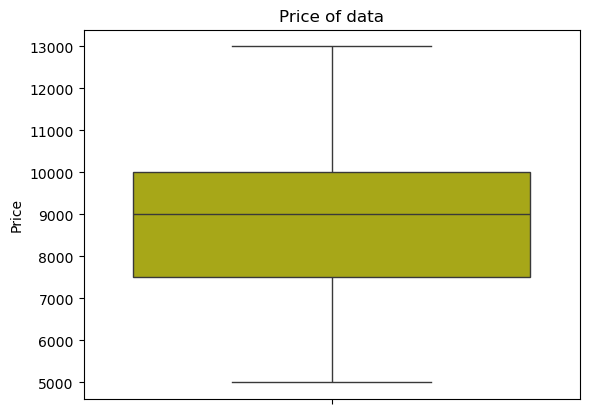

In [170]:
sns.boxplot(df['Price'],color='y')
plt.title('Price of data') 
plt.show()

In [171]:
df

,Title,Location,Price,Room Info,Type,Places
0,Zolo Lakeview PG/Paying Guest,Gowlidoddy,9597.0,"Single Room ₹19,194 Twin Sharing ₹9,597","Coed₹9,597 OnwardsBeds Available Zolo Lakeview...",430.9 Km from Udaya Memorial High School 437.8...
1,Zolo Green Valley PG/Paying Guest,Kondapur,10557.0,"Twin Sharing With AC ₹10,557 Single Room With...","Coed₹10,557 OnwardsBeds Available Zolo Green V...",424.4 Km from Udaya Memorial High School 431.2...
2,Surya Luxury Coliving and Men's PG/Paying Guest,Kondapur,7000.0,"Single Room ₹16,500 Twin Sharing ₹10,500 Tri...","Coed₹7,000 OnwardsFood IncludedBeds Available ...",0.2 Km from Sarada High School 0.8 Km from Koh...
3,ASHOK REDDY PG/Paying Guest FOR MEN,Kondapur,6499.0,"Twin Sharing ₹9,000 Triple Sharing ₹7,499 Fo...","Boys₹6,499 OnwardsFood IncludedBeds Available ...",0.8 Km from World One School 1.6 Km from Kohin...
4,SRI SRINIVASA COLIVING PG/Paying Guest AND ACC...,Kondapur,9000.0,"Single Room With AC ₹19,500 Twin Sharing With...","Coed₹9,000 OnwardsFood IncludedBeds Available ...",0.8 Km from World One School 1.9 Km from Kohin...
...,...,...,...,...,...,...
345,N GRAND MEN'S PG/Paying Guest,Kondapur,10000.0,"Single Room With AC ₹22,000 Twin Sharing With...","Boys₹10,000 OnwardsFood IncludedBeds Available...",0.2 Km from Chirec International School 1.4 Km...
346,LAXMI VENKTESWARA CO-LIVING PG/Paying Guest AN...,Madhapur,10000.0,"Single Room With AC ₹27,000 Twin Sharing With...","Coed₹10,000 OnwardsFood IncludedBeds Available...",0.2 Km from Global Edgeschool Madhapur 0.6 Km ...
347,BSR WOMENS PG/Paying Guest,Gachibowli,7000.0,"Single Room ₹18,000 Twin Sharing ₹10,000 Tri...","Girls₹7,000 OnwardsFood IncludedBeds Available...",0.2 Km from Asha Kiran 1.0 Km from Dlf Cyberci...
348,SKY INN Co Living PG/Paying Guest,Kondapur,8500.0,"Single Room ₹18,000 Twin Sharing ₹13,000 Tri...","Coed₹8,500 OnwardsFood IncludedBeds Available ...",0.1 Km from Sarada High School 0.6 Km from Koh...


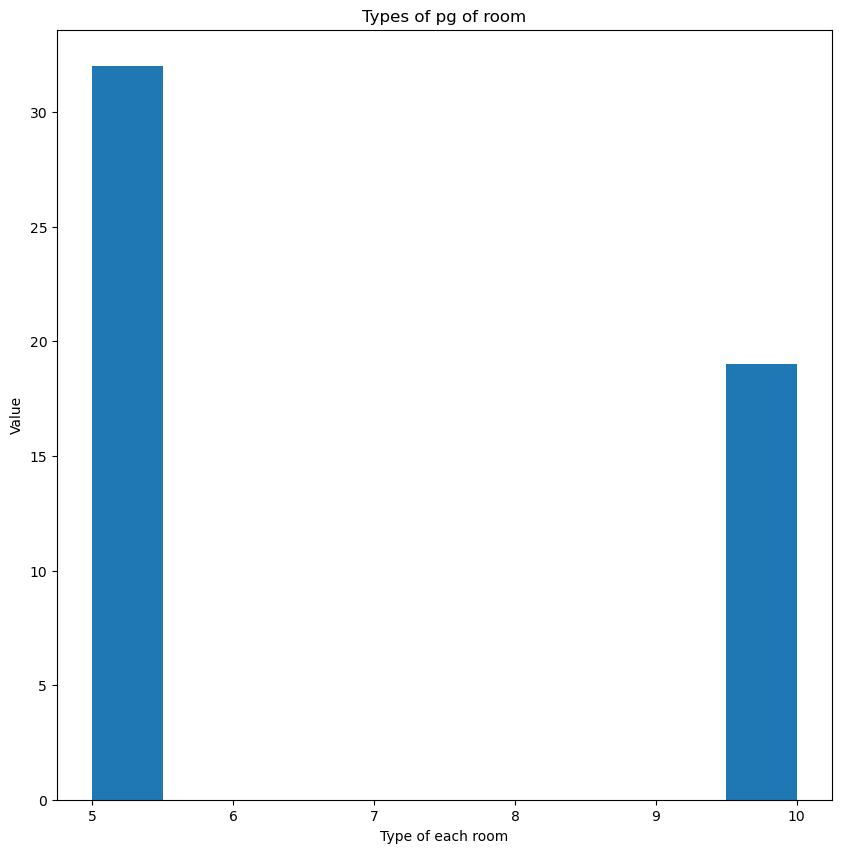

In [174]:
plt.figure(figsize=((10,10)))
df['Type'].value_counts().plot(kind='hist')
plt.xlabel('Type of each room')
plt.ylabel('Value')
plt.title('Types of pg of room')
plt.show()

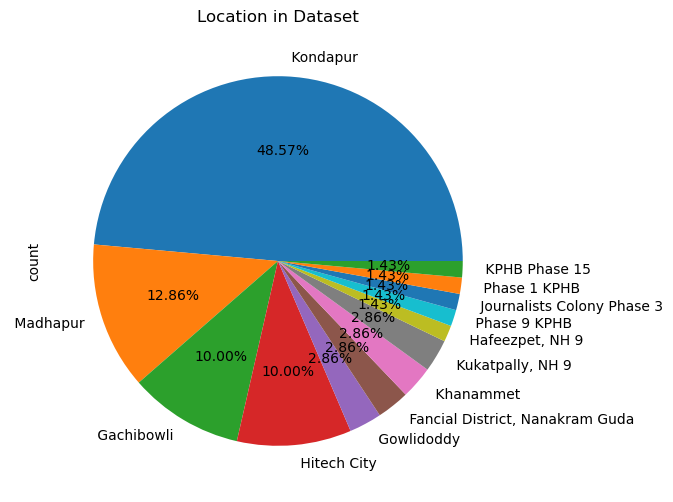

In [175]:
plt.figure(figsize=(6,6))
df['Location'].value_counts().plot.pie(autopct='%1.2f%%')
plt.title('Location in Dataset')
plt.show()

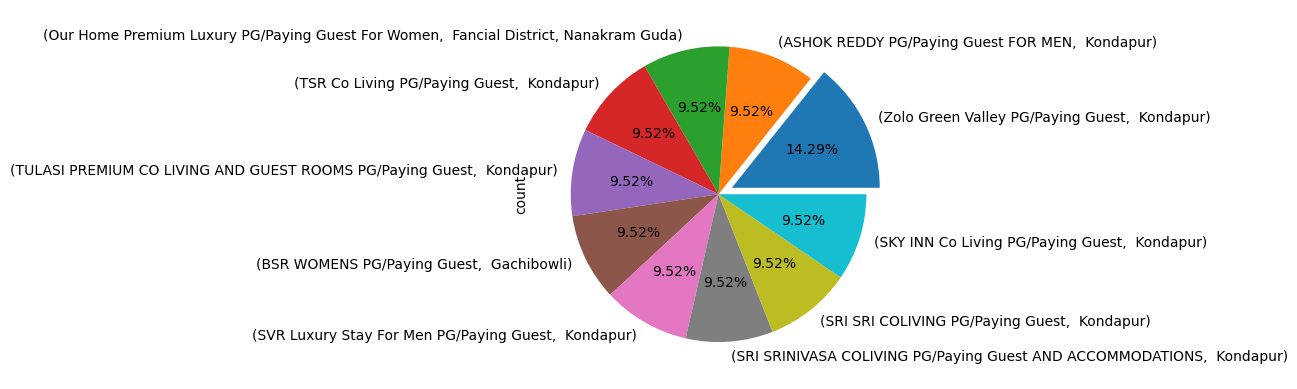

In [176]:
df.value_counts(['Title','Location']).head(10).plot.pie(autopct='%1.2f%%',explode=(0.1,0,0,0,0,0,0,0,0,0))
plt.show()

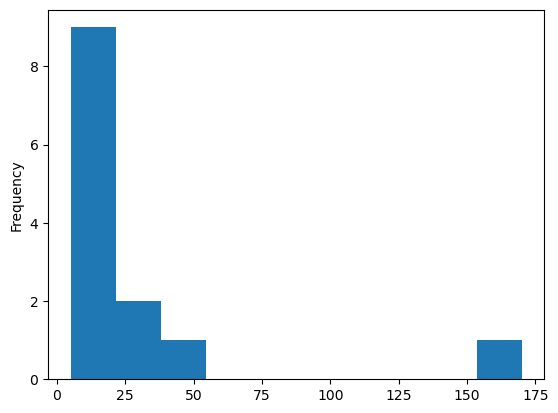

In [178]:
df['Location'].value_counts().plot(kind='hist')
plt.show()

## *Visualizing bar plot for some location for price*

In [182]:
data = {'Location': ['Gowlidoddy', 'Hitech City', 'Kondapur', 'Kondapur', 'Gachibowli'],
    'Price': ['9597', '9072', '7000', '11000', '11000']}
df = pd.DataFrame(data)

# Filter the DataFrame to include only locations in Gachibowli
df1 = df[(df['Location'] == 'Gachibowli') | (df['Location'] == 'Kondapur') | (df['Location'] == 'Hitech City')]


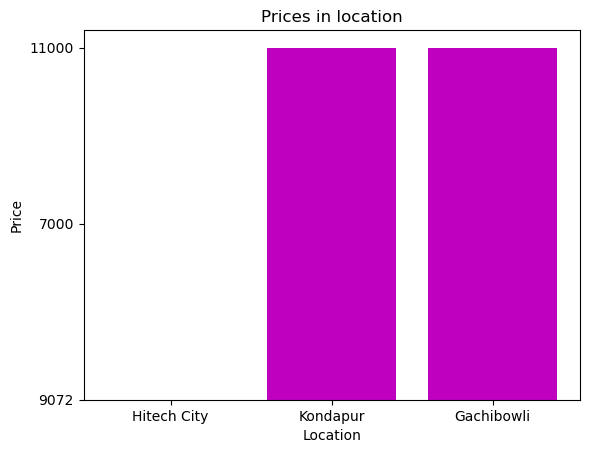

In [184]:
plt.bar(df1['Location'], df1['Price'],color='m')
plt.xlabel('Location')
plt.ylabel('Price')
plt.title('Prices in location')
plt.show()